

1.   ¿Existe una relación entre los sueldos más altos y los roles desempeñados, la carrera de grado estudiada y la experiencia?
2.   ¿Qué modelo predictivo tendra mejor performance para predecir salario: random forest, regresión lineal o xgboost?



1. CARGA DE DATOS Y LIBRERIAS

In [ ]:
%%capture
!pip install funpymodeling
!pip install pandas-profiling==2.7.1 
import pandas as pd
from google.colab.data_table import DataTable
from funpymodeling.exploratory import status, profiling_num, freq_tbl, cat_vars,num_vars 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/encuesta_clean_202102 - Hoja 1.csv', sep=',')

In [ ]:
data02=data.copy()

2. ESTADO DE SALUD DEL DF

 

*   Tratamos de identificar si los valors nulos son información o error.
*   Cuales son los valores extremos (max - min) 
*   Casos imposibles
*   Tipos de datos -> cuales y cuantos
*   Variables con alta cardinalidad
*   Distribuiciones

In [ ]:
status(data02.iloc[:,0:11])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,timestamp,0,0.000000,0,0.0,5799,object
1,estoy_trabajando_en,0,0.000000,0,0.0,1,object
2,donde_estas_trabajando,0,0.000000,0,0.0,24,object
3,tipo_de_contrato,0,0.000000,0,0.0,6,object
4,salario_mensual_o_retiro_bruto_en_tu_moneda_local,0,0.000000,0,0.0,1324,float64
5,salario_mensual_o_retiro_neto_en_tu_moneda_local,279,0.047481,0,0.0,1276,float64
6,pagos_en_dolares,4762,0.810415,0,0.0,7,object
7,cual_fue_el_ultimo_valor_de_dolar_que_tomaron,5032,0.856365,0,0.0,213,object
8,que_tan_conforme_estas_con_tu_sueldo,0,0.000000,0,0.0,4,int64
9,como_crees_que_esta_tu_sueldo_con_respecto_al_...,0,0.000000,0,0.0,4,int64


In [ ]:
status(data02.iloc[:,11:21])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,a_que_esta_atado_el_bono,1,0.00017,0,0.000000,230,object
1,tuviste_ajustes_por_inflacion_durante_2021,0,0.00000,0,0.000000,5,object
2,de_que_fue_el_ajuste_total,0,0.00000,1592,0.270933,121,int64
3,en_que_mes_fue_el_ultimo_ajuste,0,0.00000,1494,0.254255,11,int64
4,trabajo_de,0,0.00000,0,0.000000,287,object
5,anos_de_experiencia,0,0.00000,525,0.089346,44,int64
6,anos_en_la_empresa_actual,0,0.00000,2169,0.369129,37,int64
7,anos_en_el_puesto_actual,0,0.00000,1784,0.303608,32,int64
8,gente_a_cargo,0,0.00000,4394,0.747788,45,int64
9,plataformas,1,0.00017,0,0.000000,1198,object


In [ ]:
status(data02.iloc[:,22:33])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,frameworksherramientas_y_librerias,1,0.000170,0,0.000000,1175,object
1,bases_de_datos,1,0.000170,0,0.000000,1163,object
2,qa_testing,7,0.001191,0,0.000000,579,object
3,ides,2,0.000340,0,0.000000,892,object
4,cantidad_de_personas_en_tu_organizacion,0,0.000000,0,0.000000,10,object
5,unnamed27,4745,0.807522,0,0.000000,1,object
6,actividad_principal,0,0.000000,0,0.000000,3,object
7,la_recomendas_como_un_buen_lugar_para_trabajar,0,0.000000,0,0.000000,10,int64
8,como_calificas_las_politicas_de_diversidad_e_i...,0,0.000000,758,0.128999,11,int64
9,beneficios_extra,1,0.000170,0,0.000000,1850,object


In [ ]:
status(data02.iloc[:,33:44])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,nivel_de_estudios_alcanzado,2882,0.490470,0,0.0000,7,object
1,estado,2882,0.490470,0,0.0000,3,object
2,carrera,3026,0.514976,0,0.0000,323,object
3,universidad,3099,0.527400,0,0.0000,401,object
4,realizaste_cursos_de_especializacion,2882,0.490470,0,0.0000,6,object
5,contribuis_a_proyectos_open_source,2882,0.490470,0,0.0000,2,object
6,programas_como_hobbie,2882,0.490470,0,0.0000,2,object
7,salir_o_seguir_contestando1,2882,0.490470,0,0.0000,2,object
8,tenes_guardias,3123,0.531484,0,0.0000,3,object
9,cuanto_cobras_por_guardia,3123,0.531484,2559,0.4355,88,float64


In [ ]:
status(data02.iloc[:,44:55])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,salir_o_seguir_contestando2,3123,0.531484,0,0.000000,2,object
1,sufriste_o_presenciaste_situaciones_de_violenc...,3338,0.568074,0,0.000000,3,object
2,tenes_algun_tipo_de_discapacidad,5675,0.965793,0,0.000000,26,object
3,sentis_que_esto_te_dificulto_el_conseguir_trabajo,5086,0.865555,0,0.000000,2,object
4,salir_o_seguir_contestando3,3311,0.563479,0,0.000000,2,object
5,como_venis_llevando_la_pandemia,3742,0.636828,0,0.000000,4,float64
6,tenes_hijosas_menores_de_edad,3742,0.636828,1641,0.279272,5,float64
7,con_cuantas_personas_estas_conviviendo,3742,0.636828,439,0.074711,9,float64
8,con_quienes_convivis,3742,0.636828,0,0.000000,75,object
9,tenes_un_espacio_dedicado_para_el_trabajo,3742,0.636828,0,0.000000,2,object


In [ ]:
status(data02.iloc[:,55:66])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,que_tipo_de_cuarentena_hiciste_estas_haciendo,3742,0.636828,0,0.000000,4,float64
1,cambio_tu_situacion_laboral_a_raiz_de_la_pandemia,3742,0.636828,0,0.000000,124,object
2,que_tanto_sentis_que_te_esta_apoyando_tu_empre...,3742,0.636828,0,0.000000,10,float64
3,como_se_vio_afectada_tu_empresaorganizacion,3742,0.636828,0,0.000000,213,object
4,instauraron_algun_beneficio_nuevo,3742,0.636828,0,0.000000,271,object
5,tengo,0,0.000000,0,0.000000,51,int64
6,me_identifico,1,0.000170,0,0.000000,139,object
7,habias_respondido_nuestra_encuesta_en_edicione...,0,0.000000,0,0.000000,2,object
8,cuales_consideras_que_son_las_mejores_empresas...,4217,0.717665,0,0.000000,1209,object
9,sueldo_dolarizado,0,0.000000,5350,0.910483,2,bool


In [ ]:
status(data02.iloc[:,66:71])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,_sal,0,0.000000,0,0.0,1342,object
1,me_id_extra,131,0.022294,0,0.0,7,object
2,tiene_gente_a_cargo,0,0.000000,0,0.0,2,object
3,tenes_hijos_menores_str,0,0.000000,0,0.0,2,object


In [ ]:
DataTable(data02.iloc[:,26:29])

,cantidad_de_personas_en_tu_organizacion,unnamed27,actividad_principal
0,201-500,NaN,Servicios / Consultoría de Software / Digital
1,11-50,Trabajo para una empresa que no tiene oficina ...,Producto basado en Software
2,201-500,Trabajo para una empresa que no tiene oficina ...,Producto basado en Software
3,5001-10000,Trabajo para una empresa que no tiene oficina ...,Servicios / Consultoría de Software / Digital
4,2001-5000,NaN,Producto basado en Software
...,...,...,...
5871,101-200,NaN,Producto basado en Software
5872,101-200,NaN,Otras industrias
5873,1-10,NaN,Producto basado en Software
5874,2001-5000,NaN,Otras industrias


In [ ]:
DataTable(data02.iloc[:,0:9])

Output hidden; open in https://colab.research.google.com to view.

Algunas conclusiones:

*   Existen un elevado porcentaje de NAN en variables ralacionadas a: formación, programar por hobby o en proyectos open source, guardias y su remuneracion, ambiente de trabajo, constitucion familiar, espacio de trabajo y equipo compartido, pandemia, mejor empresa para trabajar. 
*   Existen un elevado porcentaje de ZEROS en variables ralacionadas a:
Dolarización del suelto, constitucion familiar, guardias y su remuneracion, tiempo en la empresa/puesto y personal a cargo, politicas de diversidad, ajuste salarial.
*    Por otro lado encontramos la variable 'salir_o_seguir_contestando' con un alto procentaje tanto de NAN como de ZEROS.
*    Tambien observamos que la variable 'salario_mensual_o_retiro_neto_en_tu_moneda_local' presentan cifras mayores que el salario bruto lo cual se trata de un error.

Acciones: 
*   eliminaremos variables que, evidentemente, no suman al analisis como son: salario_mensual_o_retiro_neto_en_tu_moneda_local, unnamed27, salir_o_seguir_contestando.
*   por otro lado solo nos quedaremos con un puñado de variables que a priori estarian relacionada con la respuesta a las preguntas planteadas, a saber: 


In [ ]:
data03=data02.drop(columns=['salario_mensual_o_retiro_neto_en_tu_moneda_local', 'unnamed27', 'salir_o_seguir_contestando','salir_o_seguir_contestando1','salir_o_seguir_contestando2','salir_o_seguir_contestando3'])
data03.shape                   

(5876, 64)

3. EXPLORAR VARIABLES NUMERICAS

In [ ]:
# ¿Cuántas var numericas existen el df?
len(num_vars(data03))

18

In [ ]:
# ¿Cuales son estas variables?
num_vars(data03)

Index(['salario_mensual_o_retiro_bruto_en_tu_moneda_local',
       'que_tan_conforme_estas_con_tu_sueldo',
       'como_crees_que_esta_tu_sueldo_con_respecto_al_ultimo_semestre',
       'de_que_fue_el_ajuste_total', 'en_que_mes_fue_el_ultimo_ajuste',
       'anos_de_experiencia', 'anos_en_la_empresa_actual',
       'anos_en_el_puesto_actual', 'gente_a_cargo',
       'la_recomendas_como_un_buen_lugar_para_trabajar',
       'como_calificas_las_politicas_de_diversidad_e_inclusion',
       'cuanto_cobras_por_guardia', 'como_venis_llevando_la_pandemia',
       'tenes_hijosas_menores_de_edad',
       'con_cuantas_personas_estas_conviviendo',
       'que_tipo_de_cuarentena_hiciste_estas_haciendo',
       'que_tanto_sentis_que_te_esta_apoyando_tu_empresaorganizacion_en_esta_situacion',
       'tengo'],
      dtype='object')

In [ ]:
profiling_num(data03)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,salario_mensual_o_retiro_bruto_en_tu_moneda_local,194581.030274,132370.839382,0.680286,33000.00,58596.8275,105000.0,160000.0,240000.0,490000.00,700000.0
1,que_tan_conforme_estas_con_tu_sueldo,2.731110,0.812786,0.297603,1.00,1.0000,2.0,3.0,3.0,4.00,4.0
2,como_crees_que_esta_tu_sueldo_con_respecto_al_...,2.658952,0.888943,0.334321,1.00,1.0000,2.0,3.0,3.0,4.00,4.0
3,de_que_fue_el_ajuste_total,23.756127,140.134471,5.898877,0.00,0.0000,0.0,15.0,28.0,50.00,100.0
4,en_que_mes_fue_el_ultimo_ajuste,3.887338,2.774394,0.713700,0.00,0.0000,0.0,4.0,7.0,7.00,8.0
5,anos_de_experiencia,8.064670,9.537540,1.182632,0.00,0.0000,2.0,6.0,12.0,21.25,30.0
6,anos_en_la_empresa_actual,3.619129,27.518689,7.603678,0.00,0.0000,0.0,1.0,4.0,15.00,23.0
7,anos_en_el_puesto_actual,2.777229,4.159325,1.497653,0.00,0.0000,0.0,2.0,3.0,10.00,17.0
8,gente_a_cargo,1.924609,7.760189,4.032087,0.00,0.0000,0.0,0.0,1.0,10.00,30.0
9,la_recomendas_como_un_buen_lugar_para_trabajar,7.588666,1.864919,0.245751,2.00,4.0000,7.0,8.0,9.0,10.00,10.0


In [ ]:
data03.describe().T

,count,mean,std,min,25%,50%,75%,max
salario_mensual_o_retiro_bruto_en_tu_moneda_local,5876.0,194581.030274,132370.839382,14400.0,105000.0,160000.0,240000.0,774000.0
que_tan_conforme_estas_con_tu_sueldo,5876.0,2.731110,0.812786,1.0,2.0,3.0,3.0,4.0
como_crees_que_esta_tu_sueldo_con_respecto_al_ultimo_semestre,5876.0,2.658952,0.888943,1.0,2.0,3.0,3.0,4.0
de_que_fue_el_ajuste_total,5876.0,23.756127,140.134471,0.0,0.0,15.0,28.0,7112.0
en_que_mes_fue_el_ultimo_ajuste,5876.0,3.887338,2.774394,0.0,0.0,4.0,7.0,12.0
anos_de_experiencia,5876.0,8.064670,9.537540,0.0,2.0,6.0,12.0,475.0
anos_en_la_empresa_actual,5876.0,3.619129,27.518689,0.0,0.0,1.0,4.0,2021.0
anos_en_el_puesto_actual,5876.0,2.777229,4.159325,0.0,0.0,2.0,3.0,75.0
gente_a_cargo,5876.0,1.924609,7.760189,0.0,0.0,0.0,1.0,180.0
la_recomendas_como_un_buen_lugar_para_trabajar,5876.0,7.588666,1.864919,1.0,7.0,8.0,9.0,10.0


In [ ]:
# data03.hist(figsize=(20,20))

Algunas conclusiones:
*   Variables relacionadas al tiempo transcurrido en una empresa, puesto o rol presentan valores máximos atipicos, como por ejemplo la var. 'anos_de_experiencia' presenta un máx. de 475 años lo cual es imposible. 
*   Otras variables deberiamos convertirlas en categoricas, como ejemplo: 'la_recomendas_como_un_buen_lugar_para_trabajar', 'como_calificas_las_politicas_de_diversidad_e_inclusion','como_venis_llevando_la_pandemia','que_tipo_de_cuarentena_hiciste_estas_haciendo', 'que_tanto_sentis_que_te_esta_apoyando_tu_empresaorganizacion_en_esta_situacion'
*   Con respecto de la variable 'tengo' deberiamos consultar su siginificado a los encuestadores.


In [ ]:
# Hacemos foco en var numerica de interes
status(data03.loc[:,['salario_mensual_o_retiro_bruto_en_tu_moneda_local','anos_de_experiencia','anos_en_la_empresa_actual','anos_en_el_puesto_actual']])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,salario_mensual_o_retiro_bruto_en_tu_moneda_local,0,0.0,0,0.000000,1324,float64
1,anos_de_experiencia,0,0.0,525,0.089346,44,int64
2,anos_en_la_empresa_actual,0,0.0,2169,0.369129,37,int64
3,anos_en_el_puesto_actual,0,0.0,1784,0.303608,32,int64


In [ ]:
profiling_num(data03.loc[:,['salario_mensual_o_retiro_bruto_en_tu_moneda_local','anos_de_experiencia','anos_en_la_empresa_actual','anos_en_el_puesto_actual']])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,salario_mensual_o_retiro_bruto_en_tu_moneda_local,194581.030274,132370.839382,0.680286,33000.0,58596.8275,105000.0,160000.0,240000.0,490000.00,700000.0
1,anos_de_experiencia,8.064670,9.537540,1.182632,0.0,0.0000,2.0,6.0,12.0,21.25,30.0
2,anos_en_la_empresa_actual,3.619129,27.518689,7.603678,0.0,0.0000,0.0,1.0,4.0,15.00,23.0
3,anos_en_el_puesto_actual,2.777229,4.159325,1.497653,0.0,0.0000,0.0,2.0,3.0,10.00,17.0


In [ ]:
data03.loc[:,['salario_mensual_o_retiro_bruto_en_tu_moneda_local','anos_de_experiencia','anos_en_la_empresa_actual','anos_en_el_puesto_actual']].describe().T

,count,mean,std,min,25%,50%,75%,max
salario_mensual_o_retiro_bruto_en_tu_moneda_local,5876.0,194581.030274,132370.839382,14400.0,105000.0,160000.0,240000.0,774000.0
anos_de_experiencia,5876.0,8.064670,9.537540,0.0,2.0,6.0,12.0,475.0
anos_en_la_empresa_actual,5876.0,3.619129,27.518689,0.0,0.0,1.0,4.0,2021.0
anos_en_el_puesto_actual,5876.0,2.777229,4.159325,0.0,0.0,2.0,3.0,75.0


*   Vemos que el 25% de los encuestados tiene un salario bruto mensual de $105.000 con 2 o menos años expereiencia, 0 años en el puesto actual y en la empresa.

*   Vemos que el 50% de los encuestados tiene un salario bruto mensual de '$160.000' con una experiencia mayor a los 2 años y hasta los 6 años, con 1 año en la empresa actual y 2 años en el puesto actual.

*   Los propio sucede para el 75% de los encuestados donde poseen un salario bruto mensual de '$240.000' con una experincia que va desde los 6 a los 12 años, con un tiempo en la empresa mayor a 1 años y hasta 4 años y con un tiempo en el puesto actual mayor a 2 años y hasta 3 años inclusive.

*   Para el caso del percentil 95% los encuestados poseen un salario bruto mensual de '$490.000' con una experincia que va desde los 12 a los 21 años, con un tiempo en la empresa mayor a 4 años y hasta 15 años y con un tiempo en el puesto actual mayor a 3 años y hasta 10 años inclusive.

Acciones:
*   Aplicaremos el método WINZORIZE para el tratamiento de outliers. Como punto de corte tomaremos el percentil 0.95

In [ ]:
profiling_num(data03)[['variable','mean','std_dev','variation_coef']].sort_values('variation_coef',ascending=False)

,variable,mean,std_dev,variation_coef
6,anos_en_la_empresa_actual,3.619129,27.518689,7.603678
11,cuanto_cobras_por_guardia,711.440610,5062.452450,7.115777
3,de_que_fue_el_ajuste_total,23.756127,140.134471,5.898877
8,gente_a_cargo,1.924609,7.760189,4.032087
13,tenes_hijosas_menores_de_edad,0.347704,0.698268,2.008226
7,anos_en_el_puesto_actual,2.777229,4.159325,1.497653
5,anos_de_experiencia,8.064670,9.537540,1.182632
14,con_cuantas_personas_estas_conviviendo,1.567479,1.305580,0.832917
4,en_que_mes_fue_el_ultimo_ajuste,3.887338,2.774394,0.713700
0,salario_mensual_o_retiro_bruto_en_tu_moneda_local,194581.030274,132370.839382,0.680286


In [ ]:
cols_to_stop=['salario_mensual_o_retiro_bruto_en_tu_moneda_local','anos_de_experiencia','anos_en_la_empresa_actual','anos_en_el_puesto_actual']

In [ ]:
# Preparación de outliers con metodo WINZORIZE
from scipy.stats.mstats import winsorize

In [ ]:
data04=data03.copy()

In [ ]:
for col in cols_to_stop: 
     data04[col] = winsorize(data03[col], limits=[None, 0.05])

In [ ]:
# ANTES DE APLICAR METODO WINZORIZE
profiling_num(data03.loc[:,['salario_mensual_o_retiro_bruto_en_tu_moneda_local','anos_de_experiencia','anos_en_la_empresa_actual','anos_en_el_puesto_actual']])[['variable', 'mean', 'std_dev', 'variation_coef']].sort_values('variation_coef', ascending=False)

,variable,mean,std_dev,variation_coef
2,anos_en_la_empresa_actual,3.619129,27.518689,7.603678
3,anos_en_el_puesto_actual,2.777229,4.159325,1.497653
1,anos_de_experiencia,8.064670,9.537540,1.182632
0,salario_mensual_o_retiro_bruto_en_tu_moneda_local,194581.030274,132370.839382,0.680286


In [ ]:
# DESPUES DE APLICAR METODO WINZORIZE
profiling_num(data04.loc[:,['salario_mensual_o_retiro_bruto_en_tu_moneda_local','anos_de_experiencia','anos_en_la_empresa_actual','anos_en_el_puesto_actual']])[['variable', 'mean', 'std_dev', 'variation_coef']].sort_values('variation_coef', ascending=False)

,variable,mean,std_dev,variation_coef
2,anos_en_la_empresa_actual,2.974983,4.138688,1.391163
3,anos_en_el_puesto_actual,2.468856,2.880641,1.166792
1,anos_de_experiencia,7.717155,6.491473,0.841174
0,salario_mensual_o_retiro_bruto_en_tu_moneda_local,188885.997429,114463.089961,0.605990


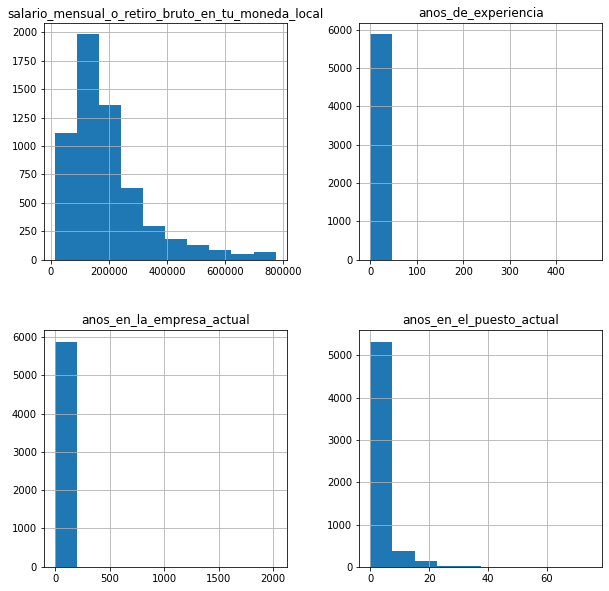

In [ ]:
# Visualizamos histogramas nuevamente
# ANTES
data03.loc[:,['salario_mensual_o_retiro_bruto_en_tu_moneda_local','anos_de_experiencia','anos_en_la_empresa_actual','anos_en_el_puesto_actual']].hist(figsize=(10,10));

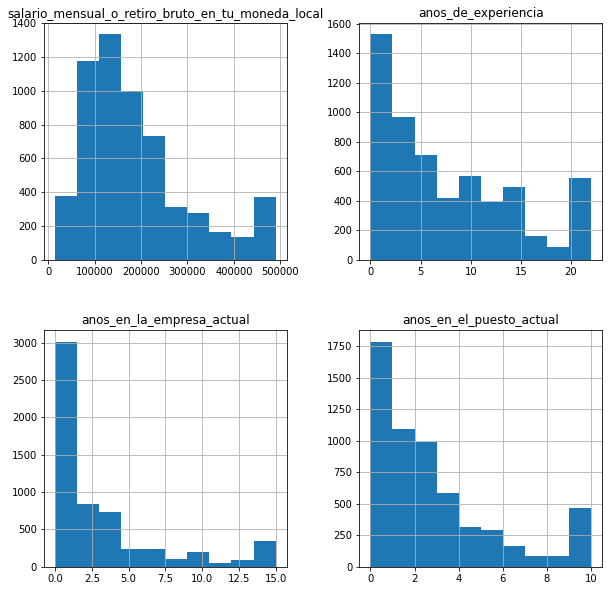

In [ ]:
# DESPUES
data04.loc[:,['salario_mensual_o_retiro_bruto_en_tu_moneda_local','anos_de_experiencia','anos_en_la_empresa_actual','anos_en_el_puesto_actual']].hist(figsize=(10,10));



*   Luego del tratamiento de los outliers los histogramas se visualizan ya no como una barra predominante sino como distribuciones extendidas asimetricas hacia la derecha.  





4. EXPLORACION VARIABLES CATEGORICAS

1.   ¿Cuantos valores de cada categoria se encuentran en nuestro dataset?, es decir debemos realizar un diagrama de frecuencias mediante diag de barra. Valores -> (abs y %). Acompañar con una tabla.
2.   Para una variable con muchas categorias -> muchos NAN? que vamos a hacer con ellos? tener en cuenta que esto sera input del modelo predictivo
3.   Observar el long tail -> debemos tomar desiciones respecto de los mismos. NO valido eliminarlos o encasillarlos en categoria otros.



In [ ]:
# ¿Cuántas var categóricas tenemos?
len(cat_vars(data04))

45

In [ ]:
# ¿Cuáles son las var. categoricas tenemos en el dataset? 
cat_vars(data04)

Index(['timestamp', 'estoy_trabajando_en', 'donde_estas_trabajando',
       'tipo_de_contrato', 'pagos_en_dolares',
       'cual_fue_el_ultimo_valor_de_dolar_que_tomaron',
       'recibis_algun_tipo_de_bono', 'a_que_esta_atado_el_bono',
       'tuviste_ajustes_por_inflacion_durante_2021', 'trabajo_de',
       'plataformas', 'lenguajes_de_programacion_o_tecnologias',
       'frameworksherramientas_y_librerias', 'bases_de_datos', 'qa_testing',
       'ides', 'cantidad_de_personas_en_tu_organizacion',
       'actividad_principal', 'beneficios_extra',
       'nivel_de_estudios_alcanzado', 'estado', 'carrera', 'universidad',
       'realizaste_cursos_de_especializacion',
       'contribuis_a_proyectos_open_source', 'programas_como_hobbie',
       'tenes_guardias', 'porcentajebruto_o_neto',
       'sufriste_o_presenciaste_situaciones_de_violencia_laboral',
       'tenes_algun_tipo_de_discapacidad',
       'sentis_que_esto_te_dificulto_el_conseguir_trabajo',
       'con_quienes_convivis', 'te

In [ ]:
# variables categoricas seleccionadas en función de lo que buscamos responder 
var_cat_sel = ['tipo_de_contrato','trabajo_de','nivel_de_estudios_alcanzado', 'estado', 'carrera', 'universidad',
       'realizaste_cursos_de_especializacion','seniority','tiene_gente_a_cargo']

In [ ]:
freq_tbl(data04.loc[:,var_cat_sel])

                                    tipo_de_contrato  ...  cumulative_perc
0                                          Full-Time  ...         0.852280
1                      Remoto (empresa de otro país)  ...         0.900783
2                                          Part-Time  ...         0.945541
3  Tercerizado (trabajo a través de consultora o ...  ...         0.974983
4                                          Freelance  ...         0.997617
5        Participación societaria en una cooperativa  ...         1.000000

[6 rows x 4 columns]

----------------------------------------------------------------

                                            trabajo_de  ...  cumulative_perc
0                                            Developer  ...         0.416610
1                              SysAdmin / DevOps / SRE  ...         0.523315
2                                     Technical Leader  ...         0.583390
3                                          QA / Tester  ...         0.627127
4

Visualizar las categorias tiene cada variable categorica. Por el momento dejamos afuera a las var categoricas con alta cardinalidad, a saber: 'trabajo_de', 'carrera' y 'universidad'.

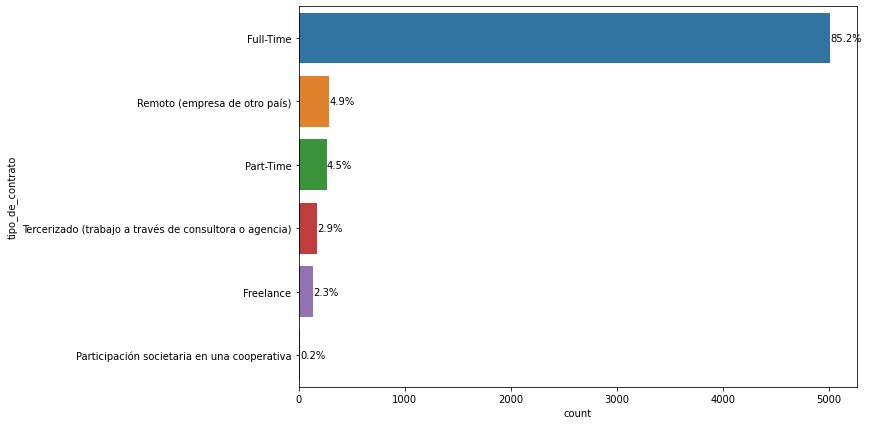

In [ ]:
# tipo de contrato
plt.figure(figsize=(10,7))
tipo_cont_cnt = data04['tipo_de_contrato'].value_counts().sort_values(ascending=False)
order = tipo_cont_cnt.index
sns.countplot(y=data04['tipo_de_contrato'], order=order)
# para poder incorporar los porcentajes
ndata04 = tipo_cont_cnt.values.sum()
for i, contador in enumerate(tipo_cont_cnt):
   pcnt = '{:0.1f}%'.format(100*contador/ndata04)
   plt.text(contador+5, i, pcnt, va ='center')
plt.show()

In [ ]:
freq_tbl(data04.loc[:,'tipo_de_contrato'])

,tipo_de_contrato,frequency,percentage,cumulative_perc
0,Full-Time,5008,0.852280,0.852280
1,Remoto (empresa de otro país),285,0.048502,0.900783
2,Part-Time,263,0.044758,0.945541
3,Tercerizado (trabajo a través de consultora o ...,173,0.029442,0.974983
4,Freelance,133,0.022634,0.997617
5,Participación societaria en una cooperativa,14,0.002383,1.000000


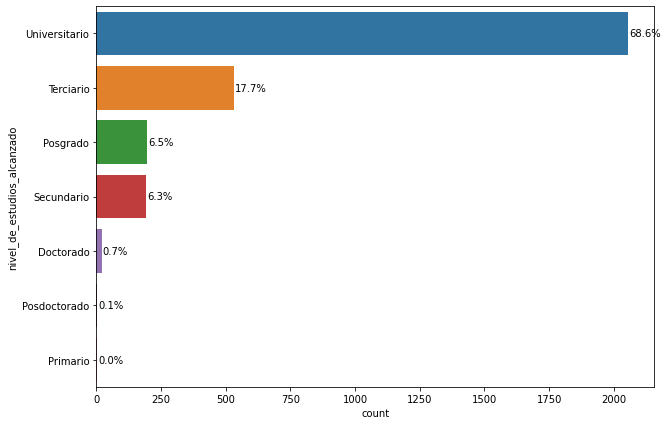

In [ ]:
# Nivel de estudio alcanzado
plt.figure(figsize=(10,7))
tipo_cont_cnt = data04['nivel_de_estudios_alcanzado'].value_counts().sort_values(ascending=False)
order = tipo_cont_cnt.index
sns.countplot(y=data04['nivel_de_estudios_alcanzado'], order=order)
ndata04 = tipo_cont_cnt.values.sum()
for i, contador in enumerate(tipo_cont_cnt):
   pcnt = '{:0.1f}%'.format(100*contador/ndata04)
   plt.text(contador+5, i, pcnt, va ='center')
plt.show()



In [ ]:
freq_tbl(data04.loc[:,'nivel_de_estudios_alcanzado'])

,nivel_de_estudios_alcanzado,frequency,percentage,cumulative_perc
0,Universitario,2054,0.349558,0.686039
1,Terciario,531,0.090368,0.863393
2,Posgrado,196,0.033356,0.928858
3,Secundario,190,0.032335,0.992318
4,Doctorado,20,0.003404,0.998998
5,Posdoctorado,2,0.000340,0.999666
6,Primario,1,0.000170,1.000000


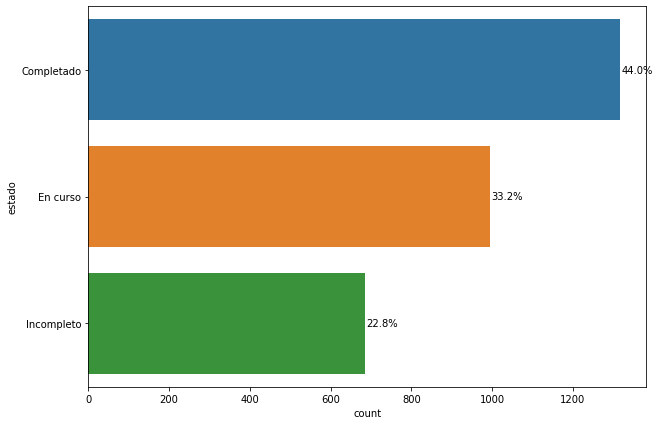

In [ ]:
# Estado
plt.figure(figsize=(10,7))
tipo_cont_cnt = data04['estado'].value_counts().sort_values(ascending=False)
order = tipo_cont_cnt.index
sns.countplot(y=data04['estado'], order=order)
ndata04 = tipo_cont_cnt.values.sum()
for i, contador in enumerate(tipo_cont_cnt):
   pcnt = '{:0.1f}%'.format(100*contador/ndata04)
   plt.text(contador+5, i, pcnt, va ='center')
plt.show()


In [ ]:
freq_tbl(data04.loc[:,'estado'])

,estado,frequency,percentage,cumulative_perc
0,Completado,1316,0.223962,0.439546
1,En curso,994,0.169163,0.771543
2,Incompleto,684,0.116406,1.000000


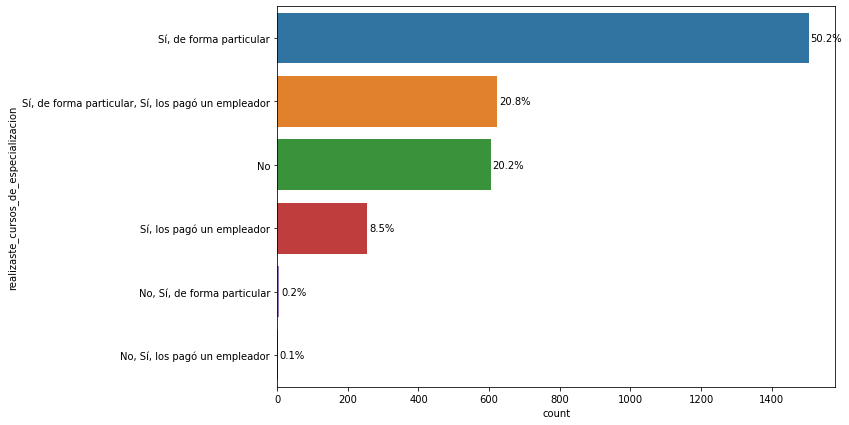

In [ ]:
# realizaste_cursos_de_especializacion
plt.figure(figsize=(10,7))
tipo_cont_cnt = data04['realizaste_cursos_de_especializacion'].value_counts().sort_values(ascending=False)
order = tipo_cont_cnt.index
sns.countplot(y=data04['realizaste_cursos_de_especializacion'], order=order)
ndata04 = tipo_cont_cnt.values.sum()
for i, contador in enumerate(tipo_cont_cnt):
   pcnt = '{:0.1f}%'.format(100*contador/ndata04)
   plt.text(contador+5, i, pcnt, va ='center')
plt.show()


In [ ]:
freq_tbl(data04.loc[:,'realizaste_cursos_de_especializacion'])

,realizaste_cursos_de_especializacion,frequency,percentage,cumulative_perc
0,"Sí, de forma particular",1504,0.255956,0.502338
1,"Sí, de forma particular, Sí, los pagó un emple...",623,0.106025,0.710421
2,No,604,0.102791,0.912158
3,"Sí, los pagó un empleador",255,0.043397,0.997328
4,"No, Sí, de forma particular",6,0.001021,0.999332
5,"No, Sí, los pagó un empleador",2,0.000340,1.000000


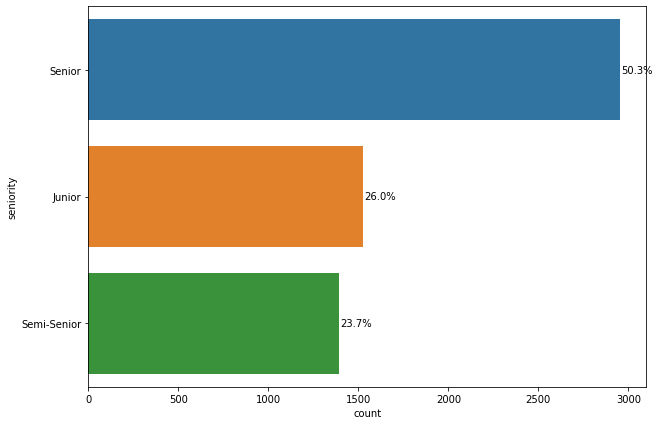

In [ ]:
# seniority
plt.figure(figsize=(10,7))
tipo_cont_cnt = data04['seniority'].value_counts().sort_values(ascending=False)
order = tipo_cont_cnt.index
sns.countplot(y=data04['seniority'], order=order)
ndata04 = tipo_cont_cnt.values.sum()
for i, contador in enumerate(tipo_cont_cnt):
   pcnt = '{:0.1f}%'.format(100*contador/ndata04)
   plt.text(contador+5, i, pcnt, va ='center')
plt.show()


In [ ]:
freq_tbl(data04.loc[:,'seniority'])

,seniority,frequency,percentage,cumulative_perc
0,Senior,2953,0.502553,0.502809
1,Junior,1528,0.260041,0.762983
2,Semi-Senior,1392,0.236896,1.000000


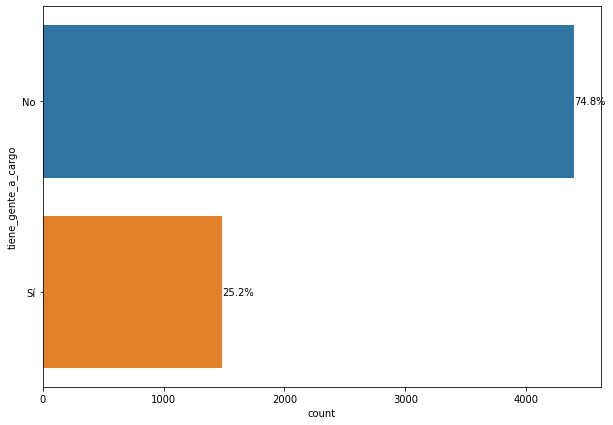

In [ ]:
 # tiene_gente_a_cargo
 plt.figure(figsize=(10,7))
tipo_cont_cnt = data04['tiene_gente_a_cargo'].value_counts().sort_values(ascending=False)
order = tipo_cont_cnt.index
sns.countplot(y=data04['tiene_gente_a_cargo'], order=order)
ndata04 = tipo_cont_cnt.values.sum()
for i, contador in enumerate(tipo_cont_cnt):
   pcnt = '{:0.1f}%'.format(100*contador/ndata04)
   plt.text(contador+5, i, pcnt, va ='center')
plt.show()

In [ ]:
freq_tbl(data04.loc[:,'tiene_gente_a_cargo'])

,tiene_gente_a_cargo,frequency,percentage,cumulative_perc
0,No,4394,0.747788,0.747788
1,Sí,1482,0.252212,1.000000


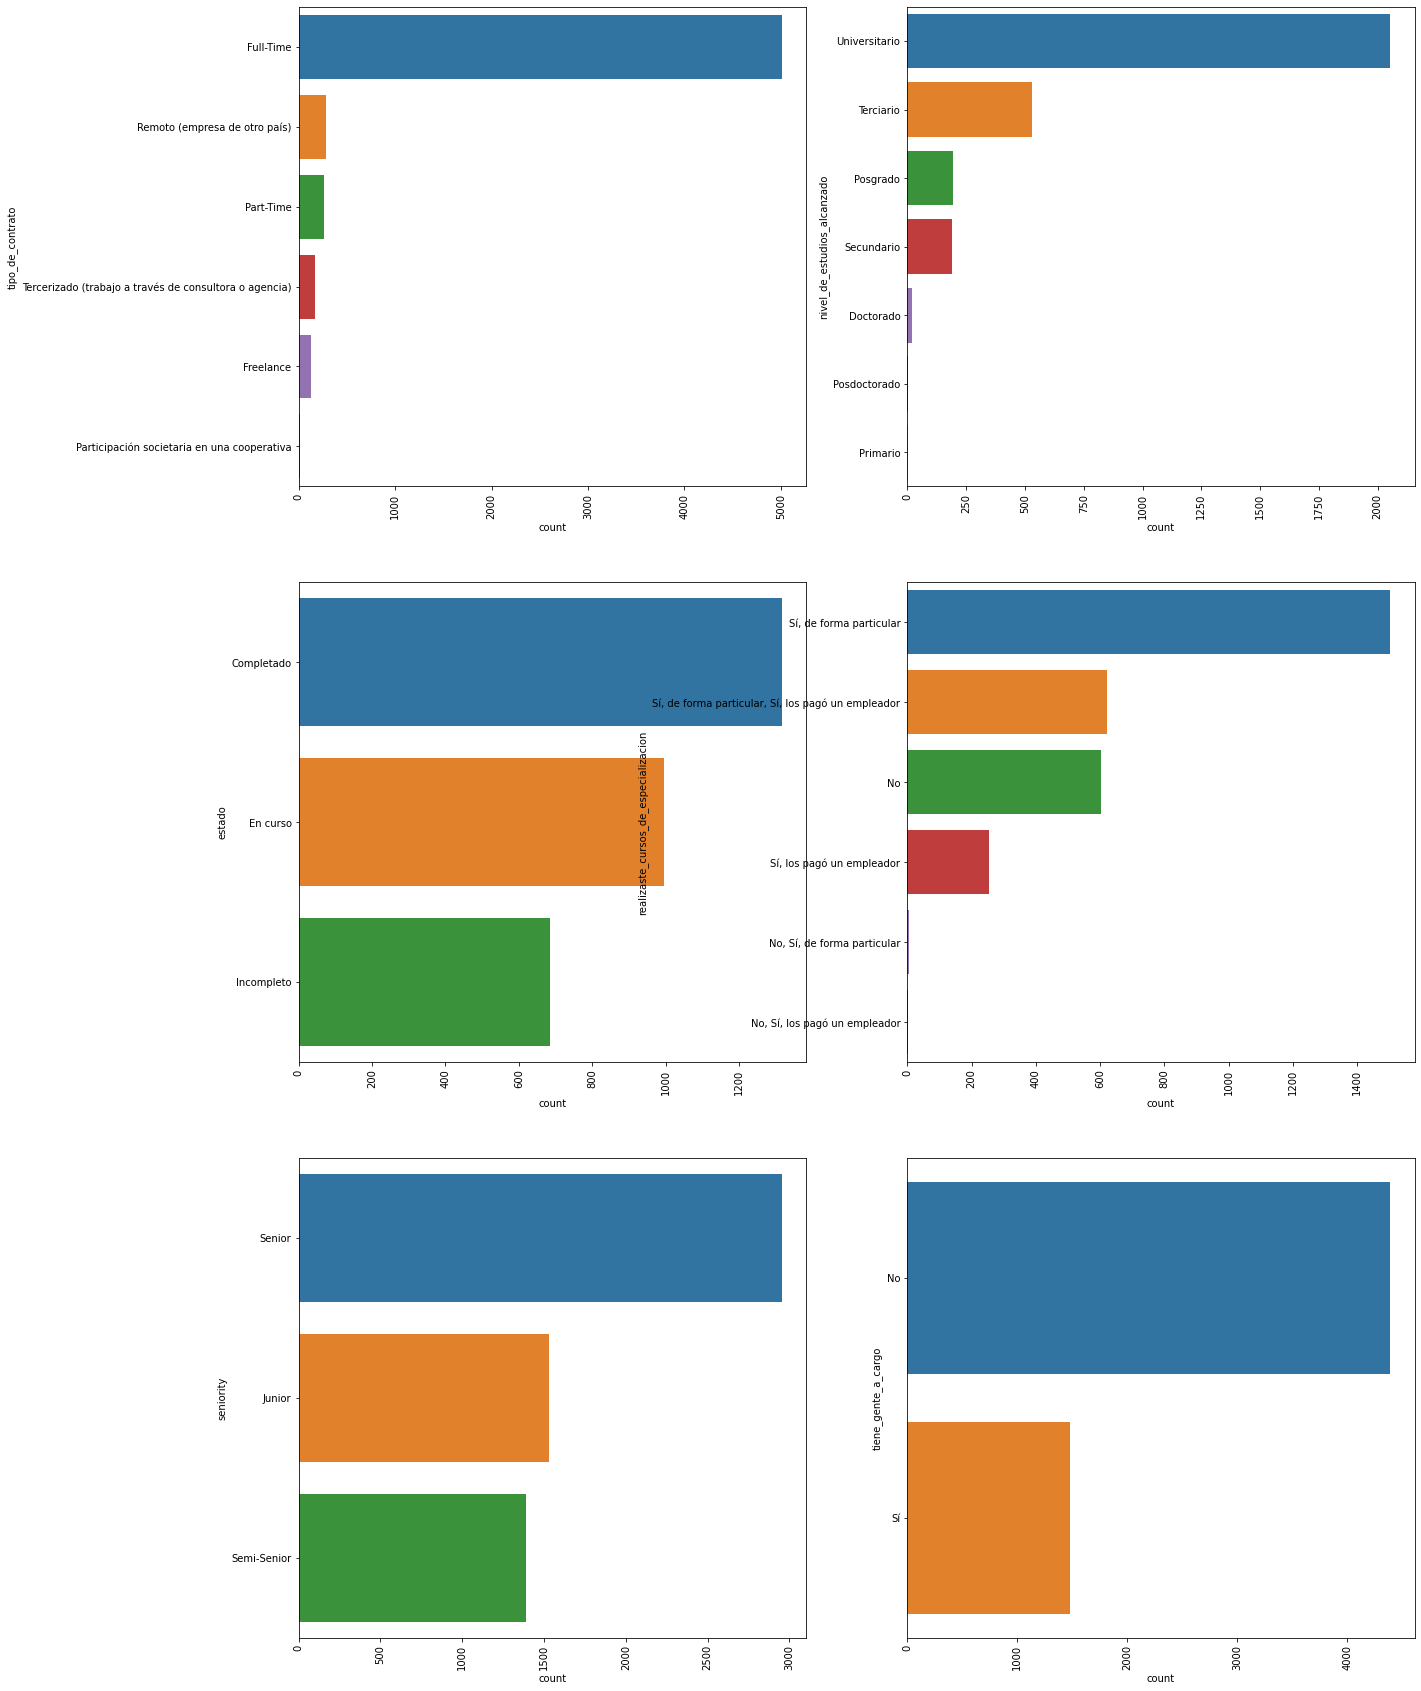

In [ ]:
# Paneo general 
var_cat_sel02 = ['tipo_de_contrato','nivel_de_estudios_alcanzado', 'estado',
       'realizaste_cursos_de_especializacion','seniority','tiene_gente_a_cargo']

d_plot=data04.loc[:,var_cat_sel02]
fig, ax = plt.subplots(3, 2, figsize=(20, 30))
for variable, subplot in zip(cat_vars(d_plot), ax.flatten()):
    sns.countplot(y=d_plot[variable], ax=subplot, order = d_plot[variable].value_counts().index)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [ ]:
# Hacemos foco en el estado de salud de nuestras var categoricas
status(data04.loc[:,var_cat_sel])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,tipo_de_contrato,0,0.000000,0,0.0,6,object
1,trabajo_de,0,0.000000,0,0.0,287,object
2,nivel_de_estudios_alcanzado,2882,0.490470,0,0.0,7,object
3,estado,2882,0.490470,0,0.0,3,object
4,carrera,3026,0.514976,0,0.0,323,object
5,universidad,3099,0.527400,0,0.0,401,object
6,realizaste_cursos_de_especializacion,2882,0.490470,0,0.0,6,object
7,seniority,3,0.000511,0,0.0,3,object
8,tiene_gente_a_cargo,0,0.000000,0,0.0,2,object


Conclusión -> Debemos tratar las var categoricas con altos NAN y alta cardinalidad

5. PANDAS PROFILING

In [ ]:
# Otra mirada rápida
from pandas_profiling import ProfileReport
ProfileReport(data04.loc[:,var_cat_sel], minimal=True)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Oh sorpresa!! Hay duplicados!! ¿Que hacemos con los duplicados?




Manos a la obra!

1.  Valores nulos NaN -> imputaremos por un valor del tipo 'nulo_tipo_de_contrato', es decir que no los eliminaremos. 
2.  Eliminaremos duplicados
3.  Var categoricas alta cardinalidad -> aplicaremos regla de Pareto como criterio de reducción. (para fines descriptivos)



In [ ]:
# Generamos nuevo DF con las variables num y cat relacionadas con preguntas que deseamos contestar y que han sido analizadas predentemente. 
var_cat_num = ['salario_mensual_o_retiro_bruto_en_tu_moneda_local','anos_de_experiencia','anos_en_la_empresa_actual','anos_en_el_puesto_actual','tipo_de_contrato','trabajo_de','nivel_de_estudios_alcanzado','estado',
 'carrera','universidad','realizaste_cursos_de_especializacion','seniority', 'tiene_gente_a_cargo']
data05=data04.loc[:,var_cat_num]


In [ ]:
# Imputamos NaN
values = {'nivel_de_estudios_alcanzado':'nulo_nivel_de_estudio','estado':'nulo_estado',
 'carrera':'nulo_carrera','universidad':'nulo_universidad','realizaste_cursos_de_especializacion':'nulo_curso_de_especializacion','seniority':'nulo_seniority'}
data06 = data05.fillna(value=values)

In [ ]:
# Verificamos imputacion de NaN
status(data06)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,salario_mensual_o_retiro_bruto_en_tu_moneda_local,0,0.0,0,0.000000,1219,float64
1,anos_de_experiencia,0,0.0,525,0.089346,23,int64
2,anos_en_la_empresa_actual,0,0.0,2169,0.369129,16,int64
3,anos_en_el_puesto_actual,0,0.0,1784,0.303608,11,int64
4,tipo_de_contrato,0,0.0,0,0.000000,6,object
5,trabajo_de,0,0.0,0,0.000000,287,object
6,nivel_de_estudios_alcanzado,0,0.0,0,0.000000,8,object
7,estado,0,0.0,0,0.000000,4,object
8,carrera,0,0.0,0,0.000000,324,object
9,universidad,0,0.0,0,0.000000,402,object


In [ ]:
# Aplicación de principio de Paretto para el tratamiento de la alta cardinalidad en var categoricas

# variable 'trabajo_de'
trabajo_de = freq_tbl(data06['trabajo_de'])
trabajo_de.head(20)

,trabajo_de,frequency,percentage,cumulative_perc
0,Developer,2448,0.416610,0.416610
1,SysAdmin / DevOps / SRE,627,0.106705,0.523315
2,Technical Leader,353,0.060075,0.583390
3,QA / Tester,257,0.043737,0.627127
4,Manager / Director,246,0.041865,0.668993
5,Project Manager,191,0.032505,0.701498
6,BI Analyst / Data Analyst,158,0.026889,0.728387
7,HelpDesk,146,0.024847,0.753233
8,Architect,128,0.021784,0.775017
9,Consultant,104,0.017699,0.792716


In [ ]:
otralista= list(trabajo_de.iloc[0:11,0])
otralista

['Developer',
 'SysAdmin / DevOps / SRE',
 'Technical Leader',
 'QA / Tester',
 'Manager / Director',
 'Project Manager',
 'BI Analyst / Data Analyst',
 'HelpDesk',
 'Architect',
 'Consultant',
 'Data Engineer']

In [ ]:
data07 = data06.copy()

In [ ]:
# Asignamos la categoría 'other' a los casos donde 'cumulative_perc' sea mayor 0.80 
# Trabajamos sobre 'trabajo_de':
for i in range(len(data07)):
    if data07.loc[i,'trabajo_de'] in otralista:
      #print(i,'pude entrar')
      data07.loc[i,'trabajo_de_02']= data07.loc[i,'trabajo_de']
    else:
      data07.loc[i,'trabajo_de_02']= 'other'
      #print(i, 'NO')  

In [ ]:
# Trabajamos sobre 'carrera':
carrera = freq_tbl(data07['carrera'])
carrera.head(20)

,carrera,frequency,percentage,cumulative_perc
0,nulo_carrera,3026,0.514976,0.514976
1,Ingeniería en Sistemas de Información,551,0.093771,0.608747
2,Ingeniería en Informática,317,0.053948,0.662696
3,Analista de Sistemas,255,0.043397,0.706093
4,Licenciatura en Sistemas de Información,166,0.028251,0.734343
5,Licenciatura en Ciencias de la Computación,163,0.027740,0.762083
6,Licenciatura en Informática,127,0.021613,0.783696
7,Tecnicatura en Programación,108,0.018380,0.802076
8,Ingeniería Electrónica,86,0.014636,0.816712
9,Tecnicatura Superior en Programación,72,0.012253,0.828965


In [ ]:
otralista02= list(carrera.iloc[0:8,0])
otralista02


['nulo_carrera',
 'Ingeniería en Sistemas de Información',
 'Ingeniería en Informática',
 'Analista de Sistemas',
 'Licenciatura en Sistemas de Información',
 'Licenciatura en Ciencias de la Computación',
 'Licenciatura en Informática',
 'Tecnicatura en Programación']

In [ ]:
for i in range(len(data07)):
    if data07.loc[i,'carrera'] in otralista02:
      #print(i,'pude entrar')
      data07.loc[i,'carrera_02']= data07.loc[i,'carrera']
    else:
      data07.loc[i,'carrera_02']= 'other'

In [ ]:
universidad = freq_tbl(data07['universidad'])
universidad.head(20)

,universidad,frequency,percentage,cumulative_perc
0,nulo_universidad,3099,0.527400,0.527400
1,UTN - Universidad Tecnológica Nacional,683,0.116236,0.643635
2,UBA - Universidad de Buenos Aires,422,0.071818,0.715453
3,UNLaM - Universidad Nacional de La Matanza,112,0.019061,0.734513
4,UADE - Universidad Argentina De la Empresa,111,0.018890,0.753404
5,UNLP - Universidad Nacional de La Plata,92,0.015657,0.769061
6,UAI - Universidad Abierta Interamericana,79,0.013445,0.782505
7,UNC - Universidad Nacional de Córdoba,58,0.009871,0.792376
8,UP - Universidad de Palermo,54,0.009190,0.801566
9,ORT,51,0.008679,0.810245


In [ ]:
otralista03= list(universidad.iloc[0:9,0])
otralista03

['nulo_universidad',
 'UTN - Universidad Tecnológica Nacional',
 'UBA - Universidad de Buenos Aires',
 'UNLaM - Universidad Nacional de La Matanza',
 'UADE - Universidad Argentina De la Empresa',
 'UNLP - Universidad Nacional de La Plata',
 'UAI - Universidad Abierta Interamericana',
 'UNC - Universidad Nacional de Córdoba',
 'UP - Universidad de Palermo']

In [ ]:
# Trabajamos sobre 'universidad':
for i in range(len(data07)):
    if data07.loc[i,'universidad'] in otralista03:
      #print(i,'pude entrar')
      data07.loc[i,'universidad_02']= data07.loc[i,'universidad']
    else:
      data07.loc[i,'universidad_02']= 'other'

In [ ]:
# Verificamos 
status(data07)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,salario_mensual_o_retiro_bruto_en_tu_moneda_local,0,0.0,0,0.000000,1219,float64
1,anos_de_experiencia,0,0.0,525,0.089346,23,int64
2,anos_en_la_empresa_actual,0,0.0,2169,0.369129,16,int64
3,anos_en_el_puesto_actual,0,0.0,1784,0.303608,11,int64
4,tipo_de_contrato,0,0.0,0,0.000000,6,object
5,trabajo_de,0,0.0,0,0.000000,287,object
6,nivel_de_estudios_alcanzado,0,0.0,0,0.000000,8,object
7,estado,0,0.0,0,0.000000,4,object
8,carrera,0,0.0,0,0.000000,324,object
9,universidad,0,0.0,0,0.000000,402,object


In [ ]:
# Eliminamos las variables categoricas previamente tratadas
data08= data07.drop(['trabajo_de','carrera','universidad'],axis=1)
status(data08)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,salario_mensual_o_retiro_bruto_en_tu_moneda_local,0,0.0,0,0.000000,1219,float64
1,anos_de_experiencia,0,0.0,525,0.089346,23,int64
2,anos_en_la_empresa_actual,0,0.0,2169,0.369129,16,int64
3,anos_en_el_puesto_actual,0,0.0,1784,0.303608,11,int64
4,tipo_de_contrato,0,0.0,0,0.000000,6,object
5,nivel_de_estudios_alcanzado,0,0.0,0,0.000000,8,object
6,estado,0,0.0,0,0.000000,4,object
7,realizaste_cursos_de_especializacion,0,0.0,0,0.000000,7,object
8,seniority,0,0.0,0,0.000000,4,object
9,tiene_gente_a_cargo,0,0.0,0,0.000000,2,object


In [ ]:
# ¿Cuántos valores duplicados tengo ahora?
data08[data08.duplicated()].shape

(142, 13)

In [ ]:
# Elimnamos duplicados
data09 = data08.drop_duplicates()
# Verificamos
data09[data09.duplicated()].shape

(0, 13)

7. ANALISIS ESTADISTICO BIVARIADO




7.1 CATEGORICA VS CATEGORICA

In [ ]:
# carrera vs estado, mostrando valores absolutos y totales
pd.crosstab(data09['carrera_02'],data09['estado'], margins=True)

estado,Completado,En curso,Incompleto,nulo_estado,All
carrera_02,,,,,
Analista de Sistemas,123,68,64,0,255
Ingeniería en Informática,108,134,74,0,316
Ingeniería en Sistemas de Información,171,212,164,0,547
Licenciatura en Ciencias de la Computación,28,89,46,0,163
Licenciatura en Informática,44,62,21,0,127
Licenciatura en Sistemas de Información,64,75,27,0,166
Tecnicatura en Programación,38,47,23,0,108
nulo_carrera,111,13,18,2754,2896
other,621,290,245,0,1156


In [ ]:
# carrera vs estado, mostrando valores relativos (en el caso Analista de Sistemas -> 123/5733 = 0.021455)
pd.crosstab(data09['carrera_02'],data09['estado'], normalize=True)

estado,Completado,En curso,Incompleto,nulo_estado
carrera_02,,,,
Analista de Sistemas,0.021451,0.011859,0.011161,0.000000
Ingeniería en Informática,0.018835,0.023369,0.012905,0.000000
Ingeniería en Sistemas de Información,0.029822,0.036972,0.028601,0.000000
Licenciatura en Ciencias de la Computación,0.004883,0.015521,0.008022,0.000000
Licenciatura en Informática,0.007674,0.010813,0.003662,0.000000
Licenciatura en Sistemas de Información,0.011161,0.013080,0.004709,0.000000
Tecnicatura en Programación,0.006627,0.008197,0.004011,0.000000
nulo_carrera,0.019358,0.002267,0.003139,0.480293
other,0.108301,0.050576,0.042728,0.000000


In [ ]:
# carrera vs estado, mostrando valores relativos en relación al total por registro (en el caso Analista de Sistemas -> 123/255 = 0.482353)
pd.crosstab(data09['carrera_02'],data09['estado'], normalize='index', margins=True)

estado,Completado,En curso,Incompleto,nulo_estado
carrera_02,,,,
Analista de Sistemas,0.482353,0.266667,0.250980,0.000000
Ingeniería en Informática,0.341772,0.424051,0.234177,0.000000
Ingeniería en Sistemas de Información,0.312614,0.387569,0.299817,0.000000
Licenciatura en Ciencias de la Computación,0.171779,0.546012,0.282209,0.000000
Licenciatura en Informática,0.346457,0.488189,0.165354,0.000000
Licenciatura en Sistemas de Información,0.385542,0.451807,0.162651,0.000000
Tecnicatura en Programación,0.351852,0.435185,0.212963,0.000000
nulo_carrera,0.038329,0.004489,0.006215,0.950967
other,0.537197,0.250865,0.211938,0.000000


In [ ]:
pd.crosstab(data09['estado'],data09['seniority'], normalize='index', margins=True)

seniority,Junior,Semi-Senior,Senior,nulo_seniority
estado,,,,
Completado,0.196483,0.221713,0.580275,0.001529
En curso,0.423232,0.315152,0.261616,0.000000
Incompleto,0.170088,0.221408,0.608504,0.000000
nulo_estado,0.232026,0.223675,0.543936,0.000363
All,0.249564,0.238751,0.511161,0.000523


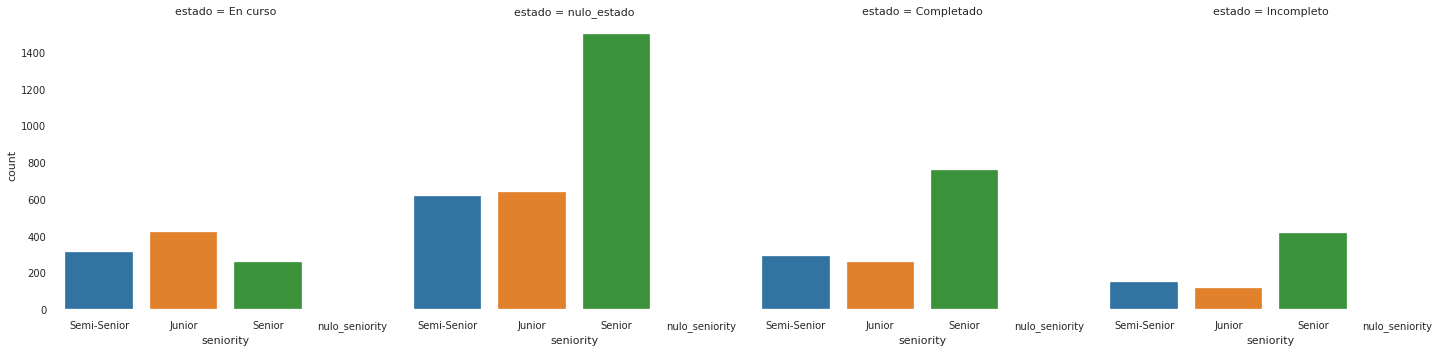

In [ ]:
g = sns.catplot(x='seniority', col='estado',data=data09,kind='count')

In [ ]:
# carrera vs estado, mostrando valores relativos en relación al total por registro (en el caso Analista de Sistemas -> 123/255 = 0.482353)
pd.crosstab(data09['carrera_02'],data09['trabajo_de_02'], normalize='index', margins=True).T

carrera_02,Analista de Sistemas,Ingeniería en Informática,Ingeniería en Sistemas de Información,Licenciatura en Ciencias de la Computación,Licenciatura en Informática,Licenciatura en Sistemas de Información,Tecnicatura en Programación,nulo_carrera,other,All
trabajo_de_02,,,,,,,,,,
Architect,0.027451,0.028481,0.025594,0.024540,0.023622,0.030120,0.000000,0.023826,0.013841,0.022149
BI Analyst / Data Analyst,0.035294,0.025316,0.029250,0.012270,0.023622,0.060241,0.018519,0.023135,0.033737,0.027206
Consultant,0.015686,0.009494,0.016453,0.012270,0.023622,0.036145,0.009259,0.020028,0.014706,0.017963
Data Engineer,0.031373,0.018987,0.016453,0.024540,0.015748,0.024096,0.018519,0.014503,0.018166,0.017091
Developer,0.388235,0.506329,0.458867,0.595092,0.496063,0.397590,0.601852,0.393646,0.346886,0.408441
HelpDesk,0.027451,0.015823,0.010969,0.024540,0.007874,0.000000,0.037037,0.026243,0.035467,0.025113
Manager / Director,0.027451,0.037975,0.036563,0.024540,0.047244,0.042169,0.009259,0.047997,0.039792,0.042204
Project Manager,0.027451,0.015823,0.056673,0.012270,0.047244,0.042169,0.009259,0.032459,0.032872,0.033310
QA / Tester,0.086275,0.015823,0.043876,0.018405,0.039370,0.048193,0.055556,0.041436,0.053633,0.044472


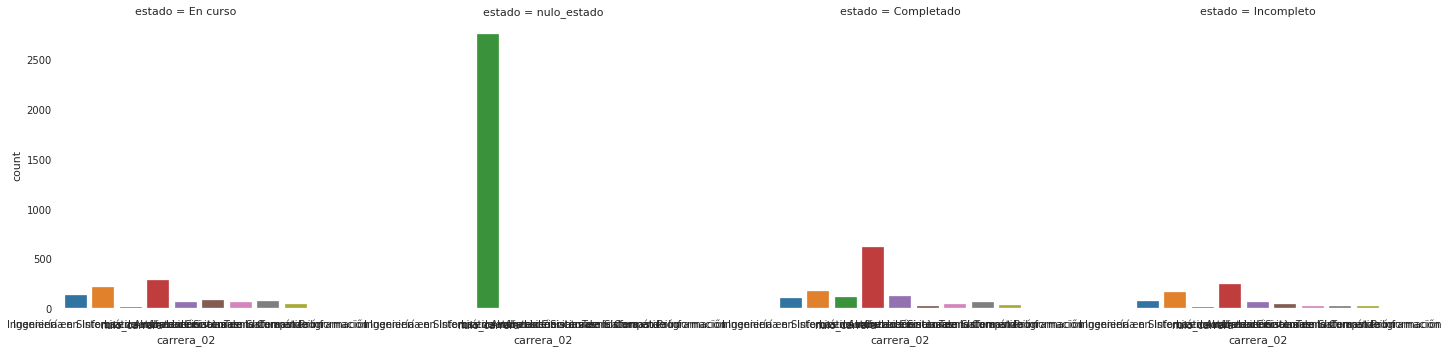

In [ ]:
g = sns.catplot(x='carrera_02', col='estado',data=data09,kind='count') # Mejorar la visualizacion

7.2 Numerica vs Categorica

*   ¿Cambia el salario de acuerdo al seniority, o tipo de contrato, carrera estudiada, o estado de la misma, o al rol desempeñado?





In [ ]:
# salario bruto vs seniority
data09.groupby('seniority')['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].mean().sort_values(ascending=False) 

seniority
Senior            227851.494026
Semi-Senior       183225.119525
nulo_seniority    174514.000000
Junior            118275.095227
Name: salario_mensual_o_retiro_bruto_en_tu_moneda_local, dtype: float64

In [ ]:
data09.groupby('seniority')['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].median().sort_values(ascending=False)

seniority
Senior            200000.0
nulo_seniority    175692.0
Semi-Senior       160000.0
Junior            100000.0
Name: salario_mensual_o_retiro_bruto_en_tu_moneda_local, dtype: float64

In [ ]:
# Para realizar un analisis más detallado 
data09.groupby('seniority')['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].describe()

,count,mean,std,min,25%,50%,75%,max
seniority,,,,,,,,
Junior,1431.0,118275.095227,71391.401932,15000.0,72000.0,100000.0,148000.0,490000.0
Semi-Senior,1369.0,183225.119525,100701.290665,14400.0,115000.0,160000.0,220000.0,490000.0
Senior,2931.0,227851.494026,119527.942776,15200.0,140000.0,200000.0,295000.0,490000.0
nulo_seniority,3.0,174514.000000,13962.320294,160000.0,167846.0,175692.0,181771.0,187850.0


Text(0.5, 0, 'Seniority')

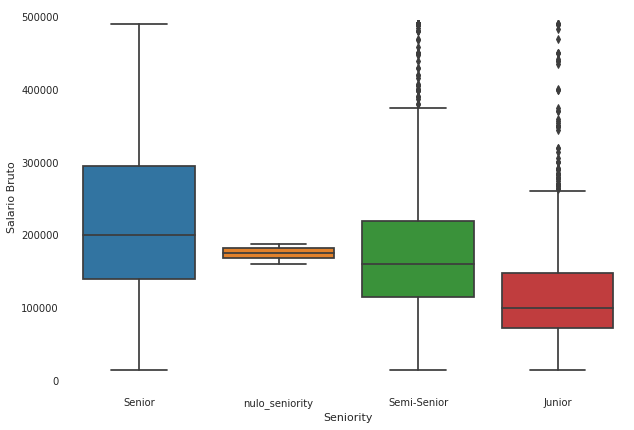

In [ ]:
plt.figure(figsize=(10,7))

index_sort= data09.groupby('seniority')['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].median().sort_values(ascending=False).index
sns.boxplot(y='salario_mensual_o_retiro_bruto_en_tu_moneda_local', x='seniority',data=data09, order= index_sort);
plt.ylabel('Salario Bruto')
plt.xlabel('Seniority')

Observando la tabla y el gráfico boxplot y focalizando en la categoria 'Junior' de la variable categorica 'seniority', podemos sacar algunas concluiones en cuanto al salario bruto:


*   Mediana = 100.000 
*   Dispersión -> Rango Intercuartil = P75-P25 = 148.000 - 72.000 = 76.000
*   Asimetria -> comparando Me-P25 con P75-Me 
*   Me-P25 = 100.000-72.000 = 28.000 y P75-Me = 48.000 => posee asimetría positiva.
*   Colas -> limite superior = P75+1.5RI=148.000+1.5*76.000=262.000
*         -> limite inferior = P25-1.5*RI=72.000-114.000= -42.000 (=>0)   





In [ ]:
data09.groupby('carrera_02')['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].describe()

,count,mean,std,min,25%,50%,75%,max
carrera_02,,,,,,,,
Analista de Sistemas,255.0,188288.130431,112988.934091,15200.0,110000.00,156000.0,230000.0,490000.0
Ingeniería en Informática,316.0,216171.795411,120698.825276,14400.0,130000.00,183633.5,272095.0,490000.0
Ingeniería en Sistemas de Información,547.0,208705.368300,123541.261603,15670.0,120000.00,175000.0,264150.0,490000.0
Licenciatura en Ciencias de la Computación,163.0,232814.489018,145877.638915,40000.0,102545.00,196287.0,330000.0,490000.0
Licenciatura en Informática,127.0,188643.759449,111405.703998,35000.0,107752.00,160479.0,240750.0,490000.0
Licenciatura en Sistemas de Información,166.0,197504.030120,112757.989356,22000.0,116042.75,173950.0,255250.0,490000.0
Tecnicatura en Programación,108.0,144841.552130,84159.137194,20000.0,89093.75,120000.0,185000.0,452812.0
nulo_carrera,2896.0,187505.937407,110553.707420,17000.0,107000.00,160000.0,240000.0,490000.0
other,1156.0,176994.163754,110413.930142,15000.0,96000.00,149250.0,220335.0,490000.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

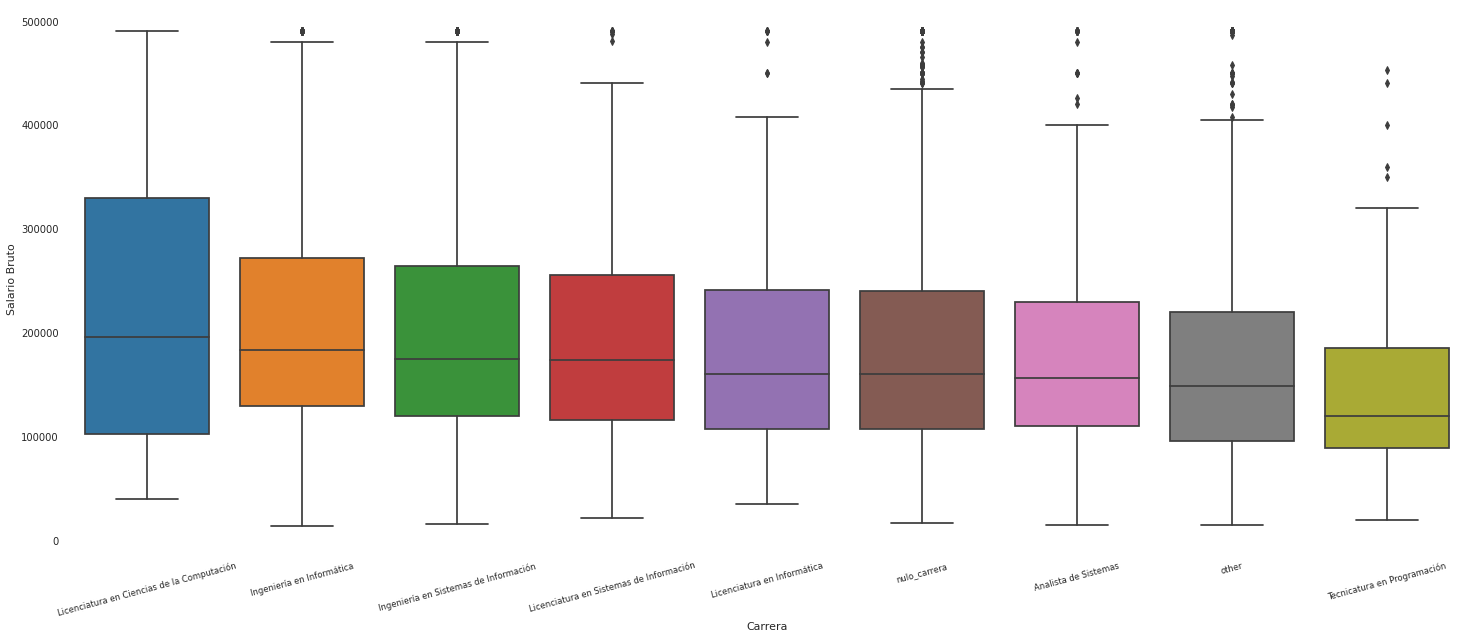

In [ ]:
plt.figure(figsize=(25,10))
index_sort= data09.groupby('carrera_02')['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].median().sort_values(ascending=False).index
sns.boxplot(y='salario_mensual_o_retiro_bruto_en_tu_moneda_local', x='carrera_02',data=data09, order= index_sort);
plt.ylabel('Salario Bruto')
plt.xlabel('Carrera')
plt.xticks(size='small',rotation=15)


In [ ]:
data09.groupby('trabajo_de_02')['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].describe()

,count,mean,std,min,25%,50%,75%,max
trabajo_de_02,,,,,,,,
Architect,127.0,263965.671102,118089.366026,22000.0,180000.00,230000.0,329500.0,490000.0
BI Analyst / Data Analyst,156.0,146128.450833,75110.343503,24000.0,90000.00,132840.5,180000.0,490000.0
Consultant,103.0,152270.101359,84844.126171,15000.0,98178.00,140000.0,180000.0,490000.0
Data Engineer,98.0,201856.295918,102253.467994,27000.0,132750.00,169500.0,250000.0,490000.0
Developer,2342.0,179889.926909,108247.393208,14400.0,100000.00,154250.0,220000.0,490000.0
HelpDesk,144.0,89829.909722,63853.762764,15670.0,61853.75,75000.0,96187.5,490000.0
Manager / Director,242.0,309226.714628,134561.526885,50000.0,200000.00,300000.0,444500.0,490000.0
Project Manager,191.0,224087.214031,98044.607321,28000.0,146000.00,210000.0,290000.0,490000.0
QA / Tester,255.0,165602.141176,108920.532376,31000.0,98300.00,130000.0,184300.0,490000.0


Text(0.5, 0, 'Rol')

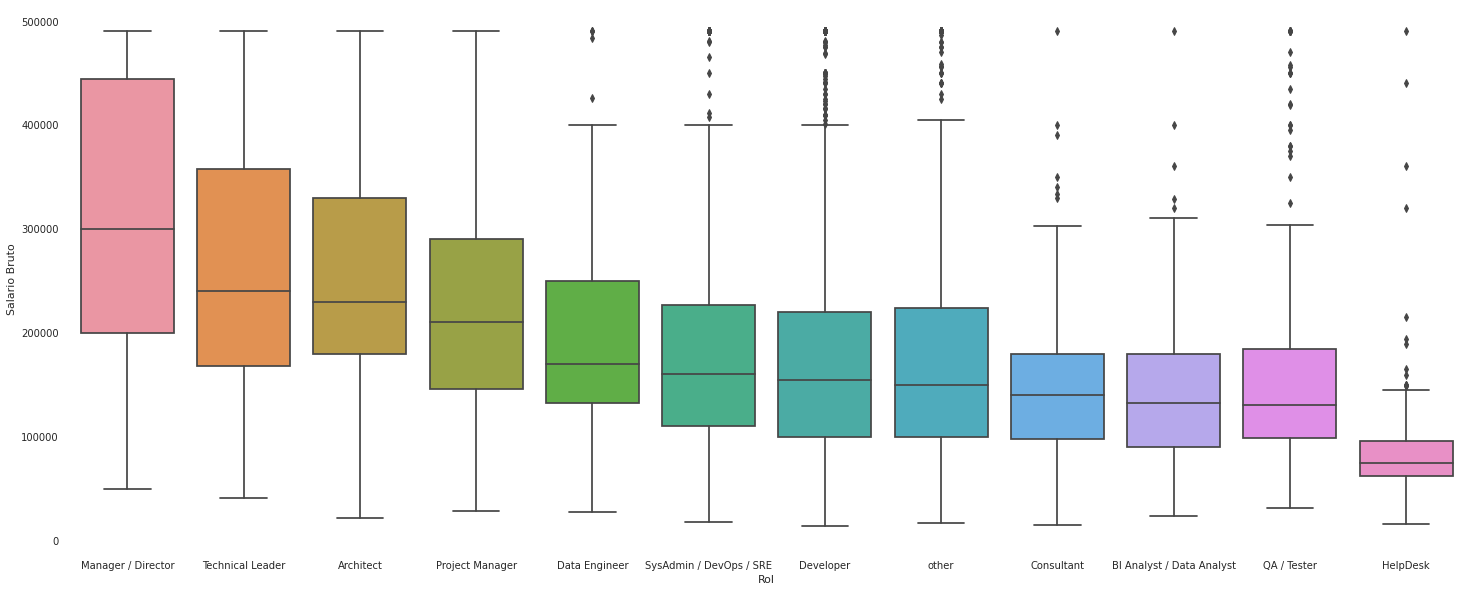

In [ ]:
plt.figure(figsize=(25,10))
index_sort= data09.groupby('trabajo_de_02')['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].median().sort_values(ascending=False).index
sns.boxplot(y='salario_mensual_o_retiro_bruto_en_tu_moneda_local', x='trabajo_de_02',data=data09, order= index_sort);
plt.ylabel('Salario Bruto')
plt.xlabel('Rol')

In [ ]:
data09.groupby('estado')['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].describe()

,count,mean,std,min,25%,50%,75%,max
estado,,,,,,,,
Completado,1308.0,206009.970841,119458.274302,15000.0,120000.00,175697.0,259043.25,490000.0
En curso,990.0,158488.940657,100446.833233,15670.0,88665.50,133105.0,200000.00,490000.0
Incompleto,682.0,210556.314457,124699.717441,14400.0,116000.00,180000.0,266500.00,490000.0
nulo_estado,2754.0,188263.842164,110824.310778,17000.0,108097.25,160000.0,240000.00,490000.0


Text(0.5, 0, 'Estado de la carrera')

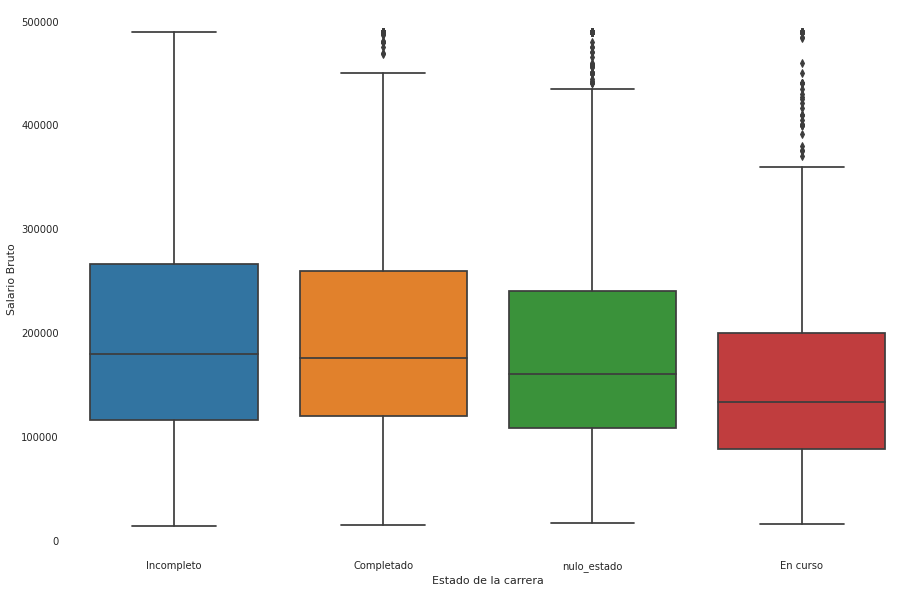

In [ ]:
plt.figure(figsize=(15,10))
index_sort= data09.groupby('estado')['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].median().sort_values(ascending=False).index
sns.boxplot(y='salario_mensual_o_retiro_bruto_en_tu_moneda_local', x='estado',data=data09, order= index_sort);
plt.ylabel('Salario Bruto')
plt.xlabel('Estado de la carrera')

In [ ]:
data09.groupby('tipo_de_contrato')['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].describe()

,count,mean,std,min,25%,50%,75%,max
tipo_de_contrato,,,,,,,,
Freelance,132.0,176733.916667,126848.816681,17000.0,80000.00,135875.0,231000.0,490000.0
Full-Time,4882.0,186261.047819,102963.906785,14400.0,110181.75,162000.0,234000.0,490000.0
Part-Time,259.0,81397.476602,54621.069390,15000.0,45000.00,68000.0,100000.0,391000.0
Participación societaria en una cooperativa,14.0,155048.571429,59758.249750,95000.0,120000.00,139000.0,178920.0,330000.0
Remoto (empresa de otro país),276.0,369574.981884,136224.623737,49500.0,255855.00,400000.0,490000.0,490000.0
Tercerizado (trabajo a través de consultora o agencia),171.0,178552.555556,128042.207425,20000.0,96000.00,138000.0,207500.0,490000.0


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

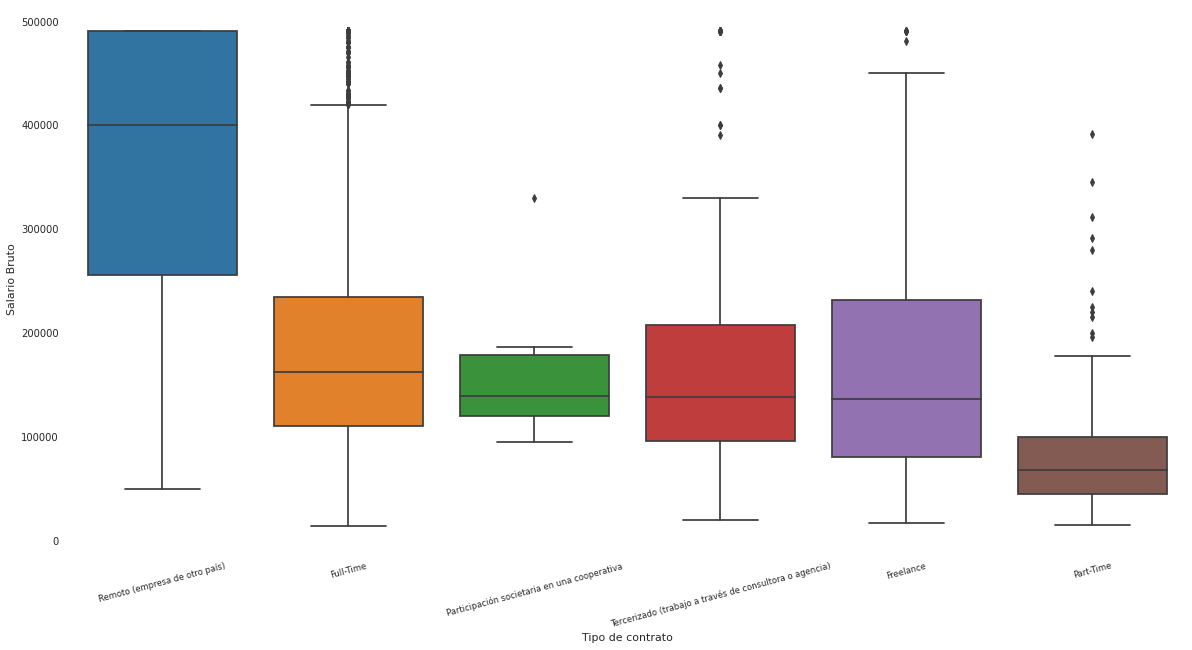

In [ ]:
plt.figure(figsize=(20,10))
index_sort= data09.groupby('tipo_de_contrato')['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].median().sort_values(ascending=False).index
sns.boxplot(y='salario_mensual_o_retiro_bruto_en_tu_moneda_local', x='tipo_de_contrato',data=data09, order= index_sort);
plt.ylabel('Salario Bruto')
plt.xlabel('Tipo de contrato')
plt.xticks(size='small',rotation=15)

7.3 Numérica vs Numérica (solo un approach grafico) 

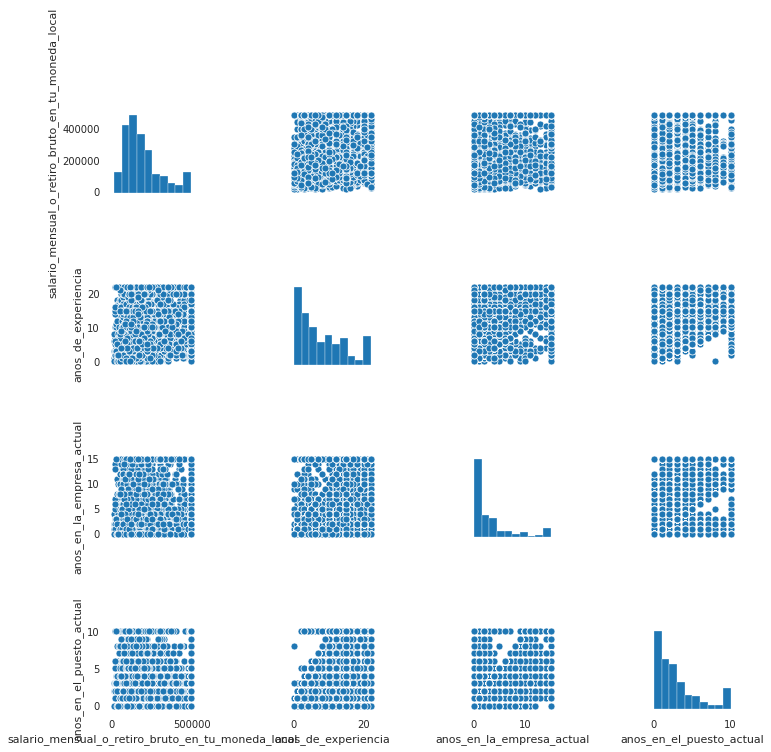

In [ ]:
# utilizamos la funcion pairplot() -> nos arroja un conjunto de graficas de a pares que para el caso particular de num vs num obtenemos un scatterplot

sns.pairplot(data09);

In [ ]:
num_vars(data09)

Index(['salario_mensual_o_retiro_bruto_en_tu_moneda_local',
       'anos_de_experiencia', 'anos_en_la_empresa_actual',
       'anos_en_el_puesto_actual'],
      dtype='object')

Text(0.5, 0, 'Años de experiencia')

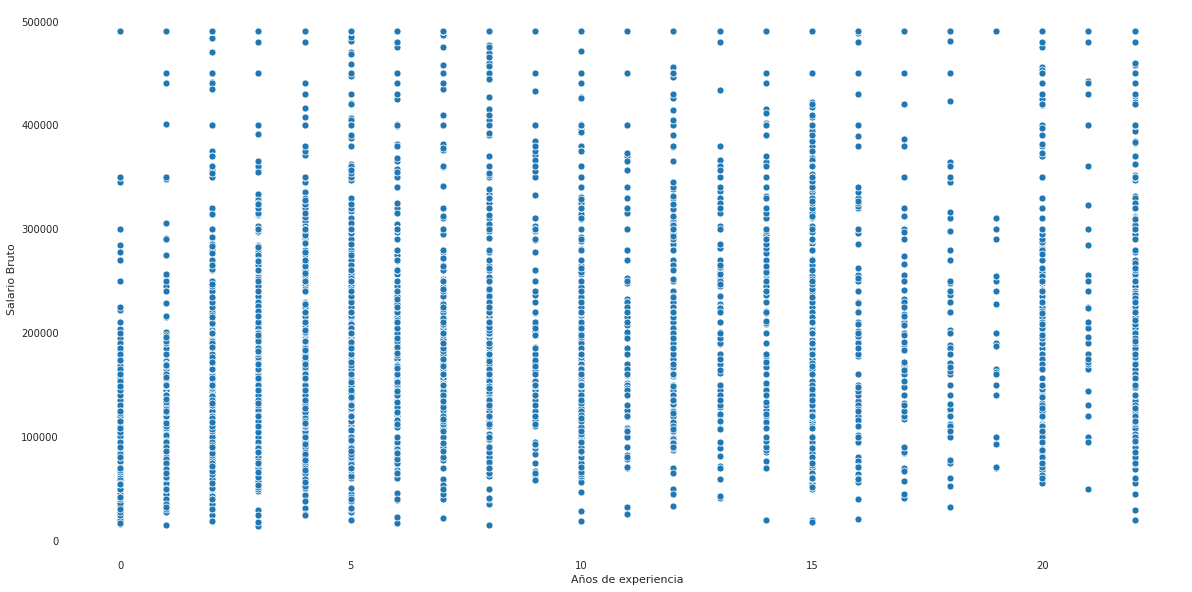

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='anos_de_experiencia',y='salario_mensual_o_retiro_bruto_en_tu_moneda_local',data=data09);
plt.ylabel('Salario Bruto')
plt.xlabel('Años de experiencia')

Conclusión -> mejor convertir 'anos_de_experiencia' en categórica y hacer un boxplot. 

Text(0.5, 0, 'Años en la empresa actual')

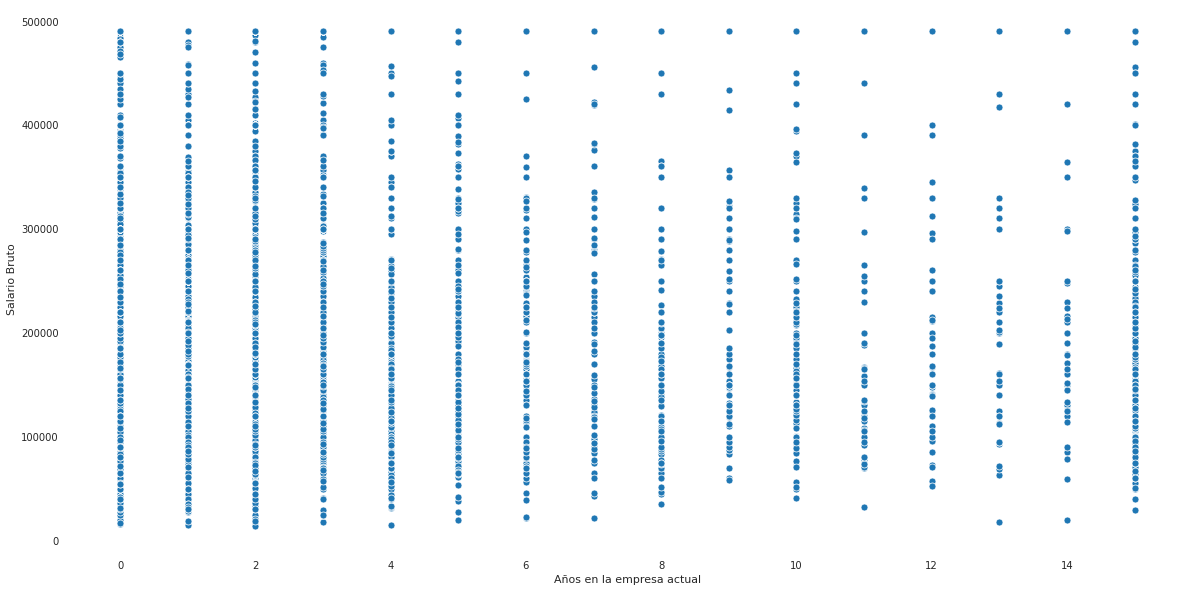

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='anos_en_la_empresa_actual',y='salario_mensual_o_retiro_bruto_en_tu_moneda_local',data=data09);
plt.ylabel('Salario Bruto')
plt.xlabel('Años en la empresa actual')

Text(0.5, 0, 'Años en e ')

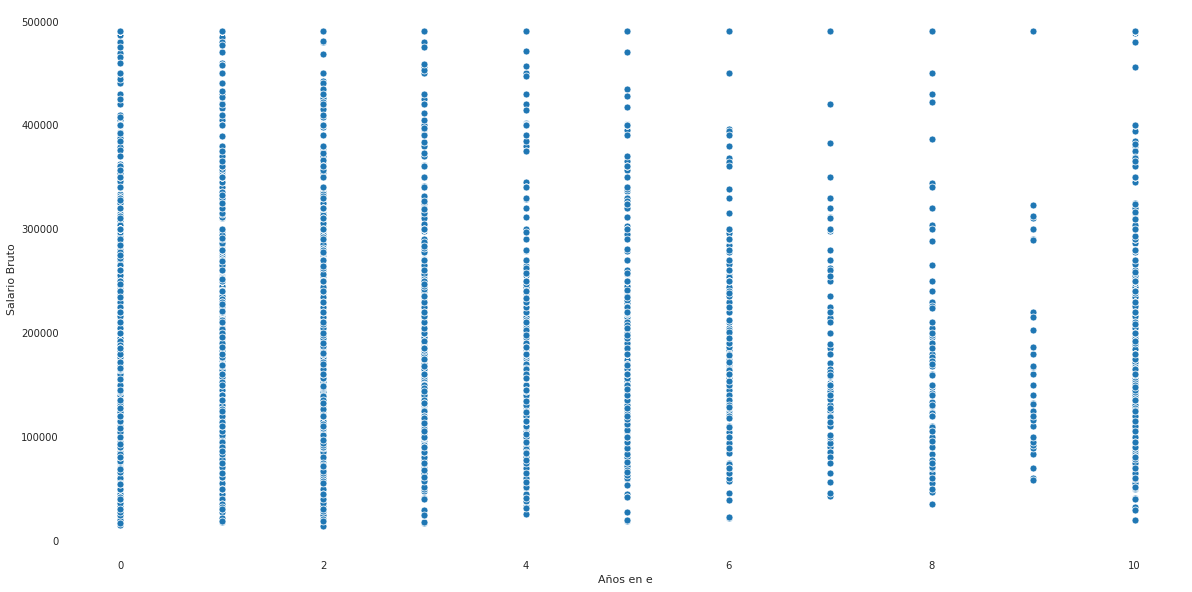

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='anos_en_el_puesto_actual',y='salario_mensual_o_retiro_bruto_en_tu_moneda_local',data=data09);
plt.ylabel('Salario Bruto')
plt.xlabel('Años en e ')